We must find innovative ways that are easy and safe to get testing and treatment done and prevent new infections, or we will see another generation with millions forced to live with HIV. In this project, we are going to have a machine learning model to determine the likelihood a test been positive or Negative and identifying the factors(features) that makes a test to be positive or negative.

In this Notebook we performing various form of Data Analysis process, we are going to be treating 4 major steps in data analysis for the solution to the problem.

1. Descriptive Analysis - This will involve charts and numbers to tell what is happening with our data records.

2. Diagonistics Analysis - This will involve correlation and stastical inference to find relationships among variables in the dataset.

3. Predictive Analysis - This involve using machine learning to make predictions for future terms.

4. Prescriptive Analysis - This will help to make decisions from our predictive model to solve the business problems.

### Methodology in solving the proplem

These are the major steps for building data science model

1. Identify the business problem

2. Organize our data set

3. Data Exploration and Data Visualization

4. Data Claeaning and Transformation.

5. Statistical Inference

6. Feature selection 

7. Creating our train and test data 

8. Evaluation the model

9. Making prediction on our test data.

10. Making decision from the model to solve the business problem.

In [76]:
!pip install shap

In [77]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
pd.options.display.float_format = '{:.5f}'.format
from xgboost import XGBClassifier
from sklearn import metrics
## For statistical test
from scipy.stats import chisquare, chi2_contingency ## Stastical test
from scipy.stats import probplot
from scipy import stats
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import shap

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Helper function

In [78]:
# For Plot Annotation

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

#### Loading our data for analysis

In [79]:
data = pd.read_csv('data.csv', encoding='latin')

In [80]:
data.head()

,dcf_event_id,distribution_date,sync_date,facility,counsellor_name,partner,kit_type,gender,last_tested,consent_for_aviro_to_collect_data,...,dropp_off_timestamp,dropp_off_screen,reminder_response,support_response,e_I_felt_like_I_could_trust_the_information_in_the_tool,e_Overall__I_found_this_tool_easy_to_use,e_I_would_recommend_self_testing_to_others,e_Overall__I_found_the_self_test_easy_to_conduct,e_Overall__I_found_the_information_in_this_tool_is_useful,e_Do_you_have_any_tips_or_suggestions_for_us_
0,79eda208-6733-4ed8-8b0f-df21d41aced7,8/29/2021 8:38,NaN,Ncotshane Clinic,Malindi Dlongolo,HST,insti,female,never,yes,...,10/26/2021 14:39,complete,True,NaN,5.00000,5.00000,5.00000,5.00000,5.00000,NaN
1,8283bc47-ddcd-4ad5-b177-6168cc9c5d3e,11/13/2021 14:31,NaN,Ncotshane Clinic,Malindi Dlongolo,HST,insti,female,6_weeks_to_3_months,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,487041ac-39ee-4ffa-b3ad-29584e1ed099,11/13/2021 14:18,NaN,Ncotshane Clinic,Malindi Dlongolo,HST,insti,male,6_weeks_to_3_months,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,677bb09d-c4bf-48d7-8b6c-4c1908176451,11/13/2021 14:32,NaN,Ncotshane Clinic,Malindi Dlongolo,HST,insti,female,3_to_6_months,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e0ba25c7-5726-477f-b34a-38e98c2fab12,11/13/2021 14:19,NaN,Ncotshane Clinic,Malindi Dlongolo,HST,insti,female,6_weeks_to_3_months,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
data.shape

(24491, 58)

In [82]:
data.isnull().sum()

dcf_event_id                                                  1901
distribution_date                                             1901
sync_date                                                    24491
facility                                                      1963
counsellor_name                                               1901
partner                                                          0
kit_type                                                      5724
gender                                                        1902
last_tested                                                   1902
consent_for_aviro_to_collect_data                             1901
consent_to_obtain_test                                        1901
appointment                                                   3645
covid_screening_travel                                        1901
covid_screening_contact                                       1901
covid_symptoms                                                

In [83]:
data.shape

(24491, 58)

In [84]:
data['results_response'].isnull().sum()

3462

Before we begin our analysis we are going to be using **results_response** as our target variable, Hence we are going to drop missing rows of target variable for futher analysis and investigation.

In [85]:
data = data.dropna(subset=['results_response']).reset_index(drop=True)

In [86]:
print('we have {} rows in our dataset'.format(data.shape[0]))
print('we have {} columns in our dataset'.format(data.shape[1]))

we have 21029 rows in our dataset
we have 58 columns in our dataset


In [87]:
integer_data = data.dtypes[data.dtypes == 'int64'].count()
float_data = data.dtypes[data.dtypes == 'float64'].count()
object_data = data.dtypes[data.dtypes == 'object'].count()

In [88]:
# Knowing the columns 
integer_data_index = data.dtypes[data.dtypes == 'int64'].index
contineous_data_index = data.dtypes[data.dtypes == 'float64'].index
categorical_data_index = data.dtypes[data.dtypes == 'object'].index

In [89]:
print('we have {} integer data type columns'.format(integer_data))
print('we have {} float data type columns'.format(float_data))
print('we have {} object data type columns'.format(object_data))

we have 0 integer data type columns
we have 9 float data type columns
we have 49 object data type columns


In [90]:
non_redundant_column =[x for x in data.select_dtypes(include='object') if data[x].nunique() <= 10 and data[x].nunique() > 1]
redundant_column = [x for x in data.select_dtypes(include='object') if data[x].nunique() <= 10 and data[x].nunique() == 1]

In [91]:
## Checking our Target/Dependant variable
data['results_response'].value_counts()

negative    19531
positive     1498
Name: results_response, dtype: int64

The integer data are mostly categorical in nature, hence we are going to explore them better.

In [92]:
## Value counts of each categorical 

# Counts on categorical columns
for feature in categorical_data_index:
    print(feature,':')
    print(data[feature].value_counts())
    print('----------------------------')

dcf_event_id :
5c06d0e4-9419-4d1f-a0aa-7cbf49f8b20c    5
13c45214-e157-4aec-a08a-72c348f185c6    4
a05efe9f-9139-4ae3-990f-6809bd0b6b80    4
c64e217b-29ff-4357-8160-fa60f9b20068    3
c88e6a0b-5a8b-4dbf-92bc-391a5bc8e88d    3
                                       ..
878e3880-70d2-45cf-ada9-e882fad45b1b    1
28c1e4a5-8963-4b76-8950-9120c5be0d71    1
2a4a34ae-a0e3-4618-a244-49cd311f1c74    1
701c8daa-4f66-4e8a-90cc-b1a6b624ad32    1
a539e147-7636-47aa-ab8f-0ebf147939c1    1
Name: dcf_event_id, Length: 18914, dtype: int64
----------------------------
distribution_date :
7/1/2021 9:26      6
2/8/2022 12:37     5
7/1/2021 8:20      5
1/13/2022 12:59    4
9/10/2021 13:12    4
                  ..
10/15/2021 9:37    1
12/1/2021 11:08    1
12/1/2021 11:22    1
12/1/2021 11:56    1
9/15/2021 6:52     1
Name: distribution_date, Length: 17131, dtype: int64
----------------------------
facility :
Caluza                  2049
Pongola Fixed Clinic    1592
Mpumuza                 1407
Howick         

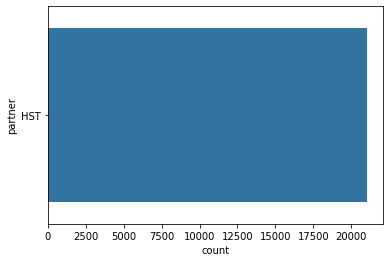

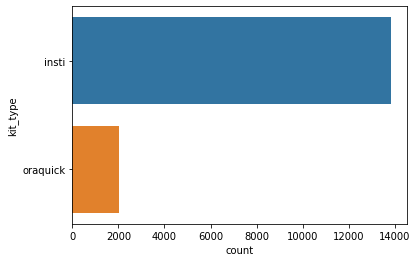

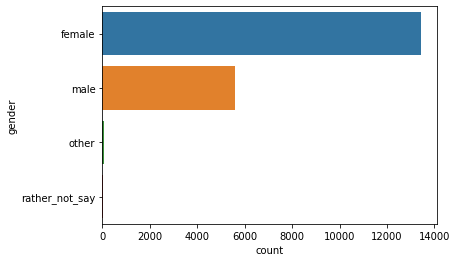

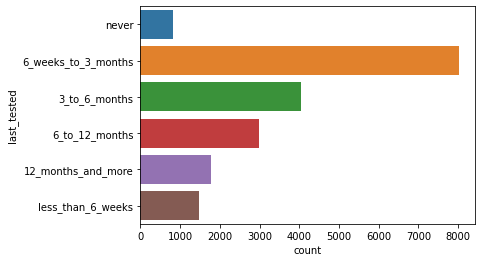

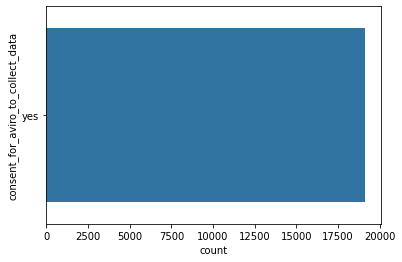

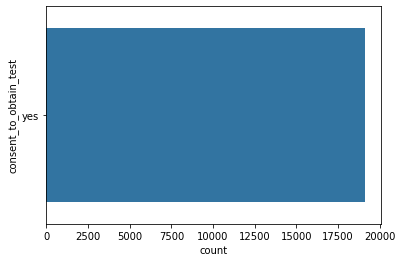

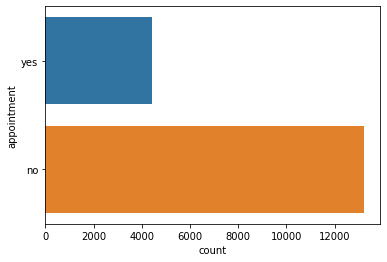

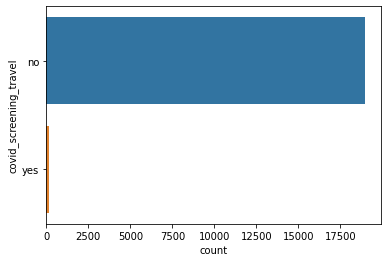

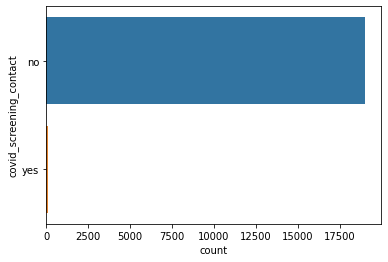

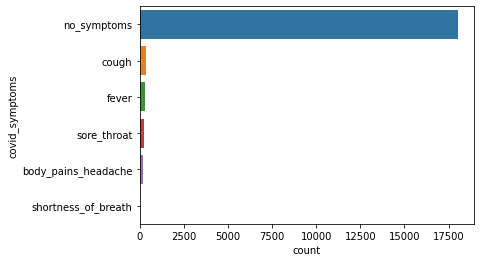

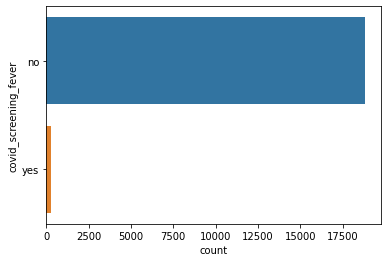

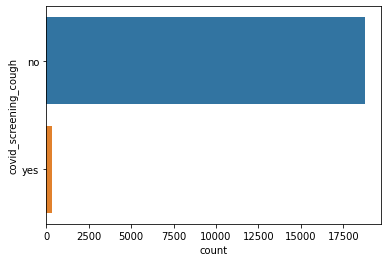

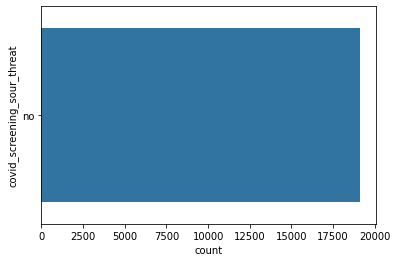

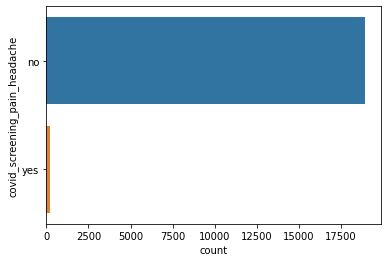

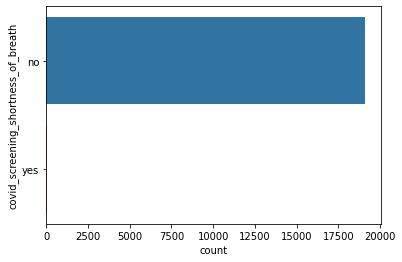

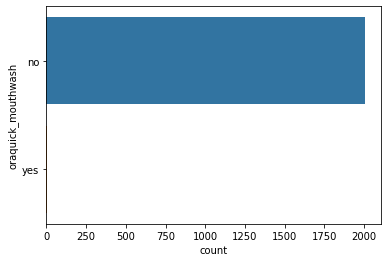

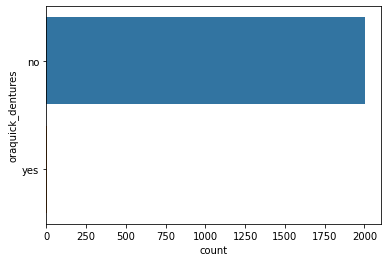

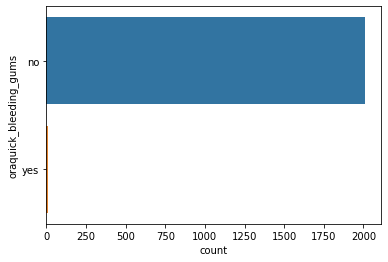

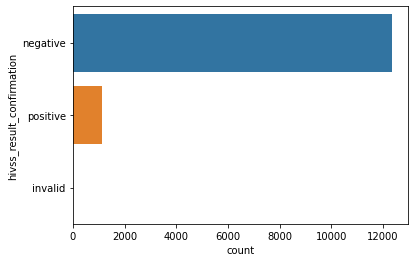

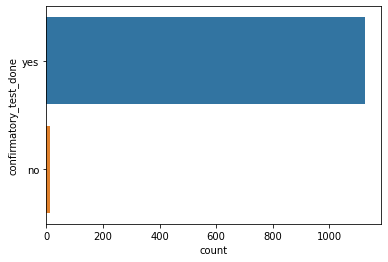

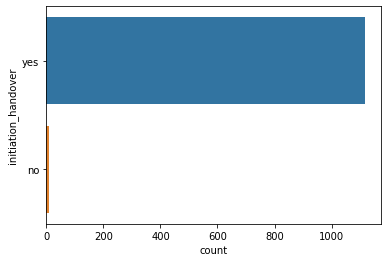

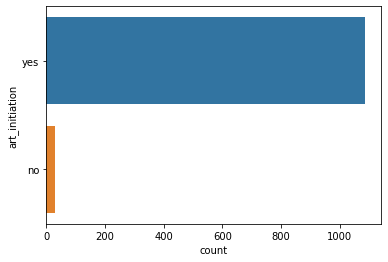

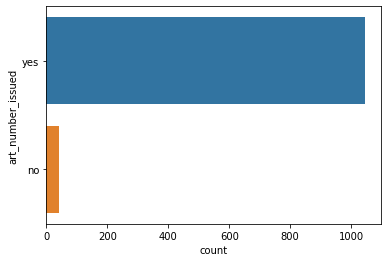

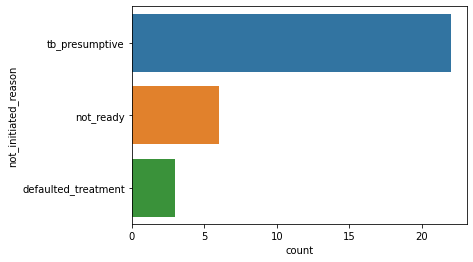

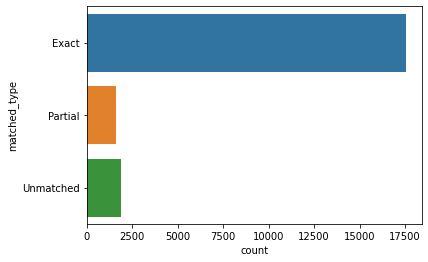

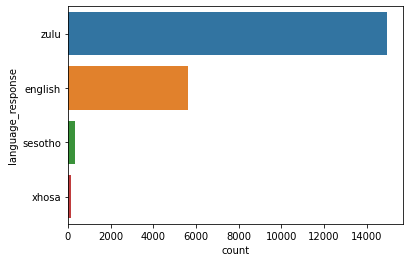

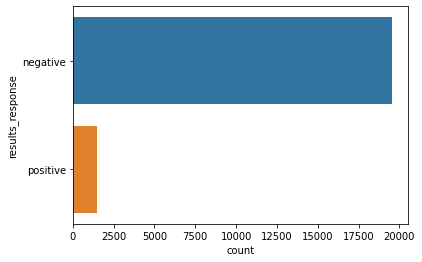

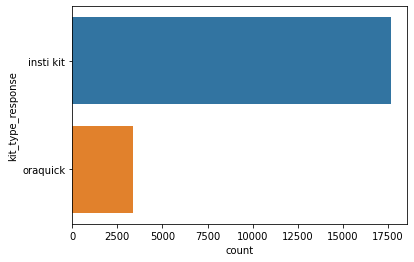

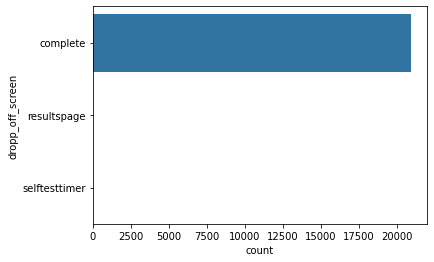

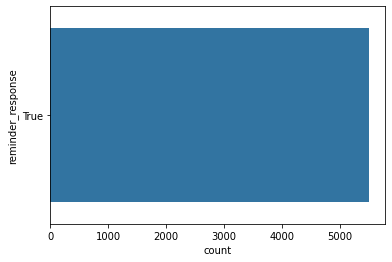

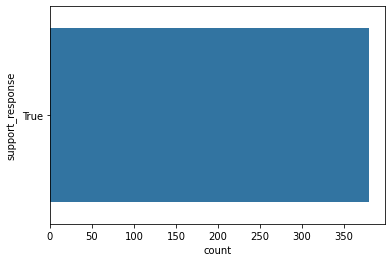

In [93]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() <= 10:
        sns.countplot(y=column, data=data)
        plt.show()

### Descriptive Analysis

In this section we are going to be looking at some features using Uni-variate and Bivariate Analysis

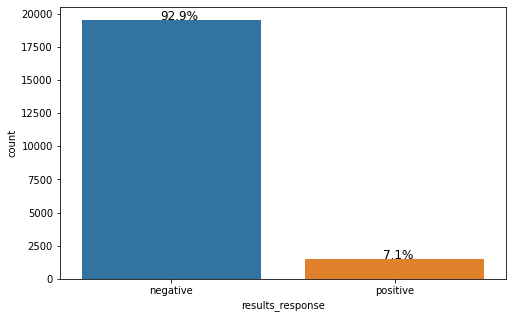

In [94]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='results_response', data=data, order = data['results_response'].value_counts().index)
without_hue(ax, data['results_response'])

92.9% of test are negative and 7.1% are positive

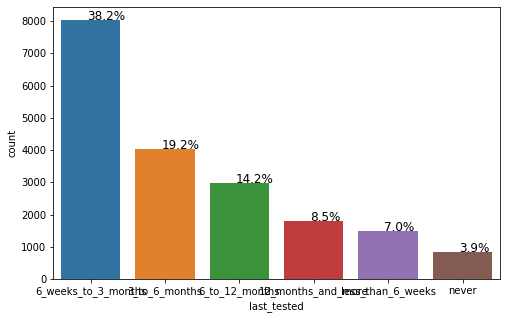

In [95]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='last_tested', data=data, order = data['last_tested'].value_counts().index)
without_hue(ax, data['last_tested'])

Most post are last tested at **6 weeks to 3 months** with 38.2%

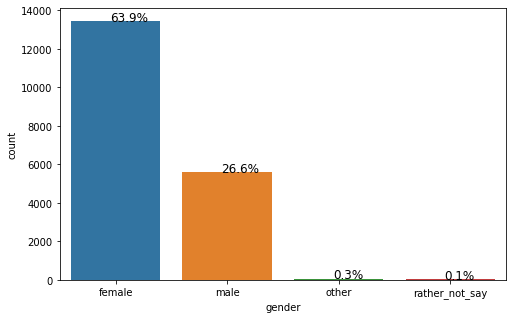

In [96]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='gender', data=data, order = data['gender'].value_counts().index)
without_hue(ax, data['gender'])

**Female** gender visited the clinic more than **Male**

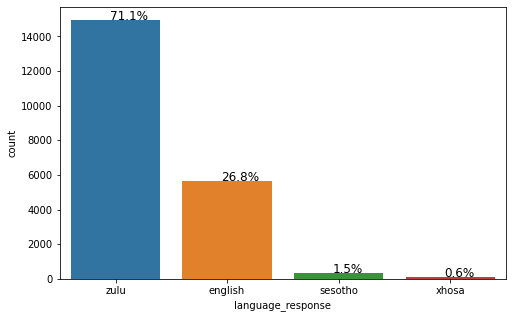

In [97]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='language_response', data=data, order = data['language_response'].value_counts().index)
without_hue(ax, data['language_response'])

Most language spoken is **Zulu** with 71.1% and least with **Xhosa** with 0.6%

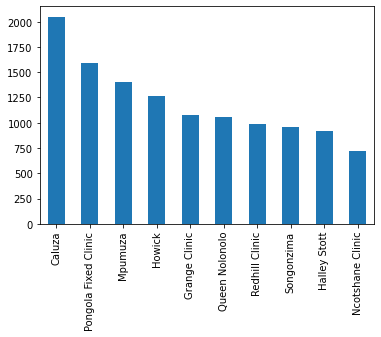

In [98]:
data['facility'].value_counts()[:10].plot(kind='bar')

The Top  10 facilities for patient

### Bivariate Analysis on the Categorical data

In [99]:
data['results_response']

0        negative
1        negative
2        negative
3        negative
4        negative
           ...   
21024    negative
21025    negative
21026    negative
21027    negative
21028    negative
Name: results_response, Length: 21029, dtype: object

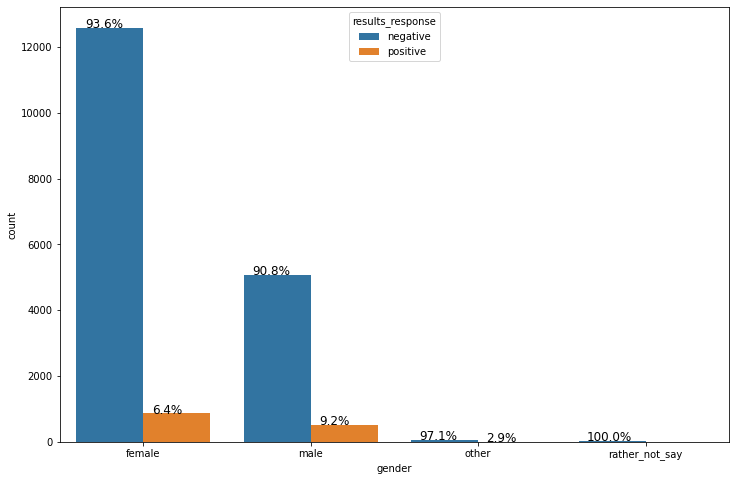

In [100]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='gender', data=data,hue='results_response', order = data['gender'].value_counts().index)
with_hue(ax, data['gender'],data['gender'].nunique(), data['results_response'].nunique())

9.2% result by **male** are positive while **female** has 6.4% and **other** 2.9%.

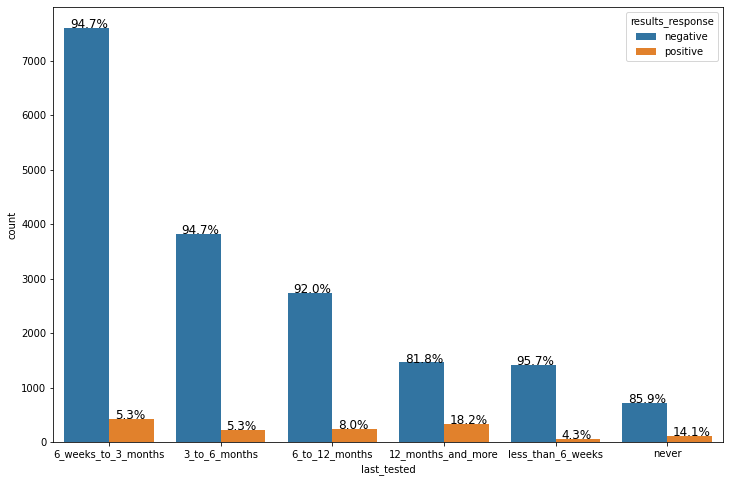

In [101]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='last_tested', data=data,hue='results_response', order = data['last_tested'].value_counts().index)
with_hue(ax, data['last_tested'],data['last_tested'].nunique(), data['results_response'].nunique())

The tested within short time are negative and while more than a 6 month tested are more positive.

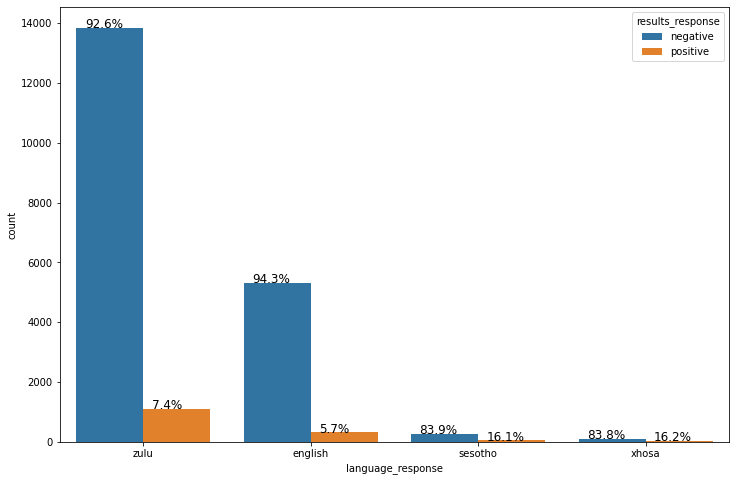

In [102]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='language_response', data=data,hue='results_response', order = data['language_response'].value_counts().index)
with_hue(ax, data['language_response'],data['language_response'].nunique(), data['results_response'].nunique())

Most tested postitve speaks **Sesotho** and **Xhosa**

In [103]:
non_redundant_column

['kit_type',
 'gender',
 'last_tested',
 'appointment',
 'covid_screening_travel',
 'covid_screening_contact',
 'covid_symptoms',
 'covid_screening_fever',
 'covid_screening_cough',
 'covid_screening_pain_headache',
 'covid_screening_shortness_of_breath',
 'oraquick_mouthwash',
 'oraquick_dentures',
 'oraquick_bleeding_gums',
 'hivss_result_confirmation',
 'confirmatory_test_done',
 'initiation_handover',
 'art_initiation',
 'art_number_issued',
 'not_initiated_reason',
 'matched_type',
 'language_response',
 'results_response',
 'kit_type_response',
 'dropp_off_screen']

### Diagonistics Analysis

In this section we check the significance of categorical features with our target variable(**result_response**) by using Chi-square good of fit.

step 1 - we have transform all our categorical features.

step 2 - using a chi square model.

In [104]:
data['results_response'] = data['results_response'].map({'negative':0, 'positive':1})

In [105]:
## transoform yes or no columns
clean_col = {'yes':1, 'no':0}

In [106]:
non_redundant_column

['kit_type',
 'gender',
 'last_tested',
 'appointment',
 'covid_screening_travel',
 'covid_screening_contact',
 'covid_symptoms',
 'covid_screening_fever',
 'covid_screening_cough',
 'covid_screening_pain_headache',
 'covid_screening_shortness_of_breath',
 'oraquick_mouthwash',
 'oraquick_dentures',
 'oraquick_bleeding_gums',
 'hivss_result_confirmation',
 'confirmatory_test_done',
 'initiation_handover',
 'art_initiation',
 'art_number_issued',
 'not_initiated_reason',
 'matched_type',
 'language_response',
 'results_response',
 'kit_type_response',
 'dropp_off_screen']

In [107]:
yes_no_colomn = ['appointment',
 'covid_screening_travel',
 'covid_screening_contact',
 'covid_symptoms',
 'covid_screening_fever',
 'covid_screening_cough',
 'covid_screening_pain_headache',
 'covid_screening_shortness_of_breath',
 'oraquick_mouthwash',
 'oraquick_dentures',
 'oraquick_bleeding_gums','confirmatory_test_done',
 'initiation_handover',
 'art_initiation',
 'art_number_issued',]

In [108]:
for col in yes_no_colomn:
    data[col] = data[col].map(clean_col)

In [109]:
data['last_tested'].unique()

array(['never', '6_weeks_to_3_months', '3_to_6_months', '6_to_12_months',
       '12_months_and_more', 'less_than_6_weeks', nan], dtype=object)

In [110]:
last_tested_clean = {'never':0, '12_months_and_more':1, '6_to_12_months':2, '3_to_6_months':3,
                    '6_weeks_to_3_months':4, 'less_than_6_weeks':5}

In [111]:
data['last_tested'] = data['last_tested'].map(last_tested_clean)

In [112]:
data = pd.get_dummies(data, columns=['gender'])

##### Formulate our hypothesis

H0 - The feature checked did not have significant role to play to the result_response

H1 - The feature checked have significant role to play to the result_response.

If the p-value is > 0.05 hence the feature did not have significance effect on result_response and vice versa.

we are going to observe the most important features using chi-square for the categorical (features)

In [113]:
col_test = ['appointment',
 'covid_screening_travel',
 'covid_screening_contact',
 'covid_symptoms',
 'covid_screening_fever',
 'covid_screening_cough',
 'covid_screening_pain_headache',
 'covid_screening_shortness_of_breath',
 'oraquick_mouthwash',
 'oraquick_dentures',
 'oraquick_bleeding_gums','confirmatory_test_done','last_tested',
 'initiation_handover',
 'art_initiation','art_number_issued','gender_female', 'gender_male',
'gender_other', 'gender_rather_not_say'] + ['results_response']

In [114]:
no_missing = data[col_test].fillna(value=0)

In [115]:
independent = no_missing.drop('results_response', axis=1)
dependent = no_missing['results_response']

In [116]:
f_score=chi2(independent,dependent)   #returns f score and p value 
f_score

(array([3.28498642e+00, 5.39908365e-01, 1.86754291e-01,            nan,
        2.23358351e+01, 1.52819030e-01, 3.32531214e+00, 8.98582807e-01,
        3.06794327e-01, 5.55737466e+00, 6.43553553e-02, 1.18937542e+04,
        1.50271958e+02, 1.18028526e+04, 1.15291101e+04, 1.10503797e+04,
        9.70006110e+00, 3.65762366e+01, 1.92580636e+00, 1.68736880e+00]),
 array([6.99162069e-02, 4.62470705e-01, 6.65631835e-01,            nan,
        2.28895149e-06, 6.95855819e-01, 6.82210635e-02, 3.43161997e-01,
        5.79654009e-01, 1.84029918e-02, 7.99740026e-01, 0.00000000e+00,
        1.51187727e-34, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.84261885e-03, 1.46810578e-09, 1.65217982e-01, 1.93948183e-01]))

In [117]:
p_value=pd.Series(f_score[1],index=independent.columns)

In [118]:
p_value.sort_values(ascending=True,inplace=True)

In [119]:
p_value

art_number_issued                     0.00000
art_initiation                        0.00000
initiation_handover                   0.00000
confirmatory_test_done                0.00000
last_tested                           0.00000
gender_male                           0.00000
covid_screening_fever                 0.00000
gender_female                         0.00184
oraquick_dentures                     0.01840
covid_screening_pain_headache         0.06822
appointment                           0.06992
gender_other                          0.16522
gender_rather_not_say                 0.19395
covid_screening_shortness_of_breath   0.34316
covid_screening_travel                0.46247
oraquick_mouthwash                    0.57965
covid_screening_contact               0.66563
covid_screening_cough                 0.69586
oraquick_bleeding_gums                0.79974
covid_symptoms                            NaN
dtype: float64

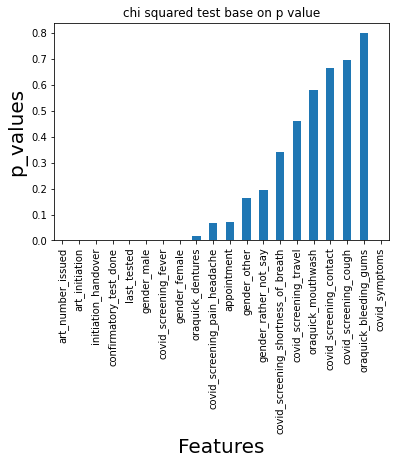

In [120]:
p_value.plot(kind="bar")
plt.xlabel("Features",fontsize=20)
plt.ylabel("p_values",fontsize=20)
plt.title("chi squared test base on p value")
plt.show()

In [121]:
p_value.to_dict().keys()

dict_keys(['art_number_issued', 'art_initiation', 'initiation_handover', 'confirmatory_test_done', 'last_tested', 'gender_male', 'covid_screening_fever', 'gender_female', 'oraquick_dentures', 'covid_screening_pain_headache', 'appointment', 'gender_other', 'gender_rather_not_say', 'covid_screening_shortness_of_breath', 'covid_screening_travel', 'oraquick_mouthwash', 'covid_screening_contact', 'covid_screening_cough', 'oraquick_bleeding_gums', 'covid_symptoms'])

**'art_number_issued', 'art_initiation', 'initiation_handover', 'confirmatory_test_done', 'last_tested', 'gender_male', 'covid_screening_fever', 'gender_female', 'oraquick_dentures', 'covid_screening_pain_headache', 'appointment'** Have significant impact on result response

While

**'gender_other', 'gender_rather_not_say', 'covid_screening_shortness_of_breath', 'covid_screening_travel', 'oraquick_mouthwash', 'covid_screening_contact', 'covid_screening_cough', 'oraquick_bleeding_gums', 'covid_symptoms'** Did not have significant impact on the result response.

### Machine learning

1. feature selection by dropping redundant features

2. split the data into train and test data

3. Missing values will be handle by Xgboost a gradient boosting model

In [122]:
data = data.drop(redundant_column, axis=1)

In [123]:
original_data = data.copy()

In [124]:
data = data.select_dtypes('float')

In [125]:
data['target'] = original_data['results_response']

In [126]:
X = data.drop('target', axis=1) # drop 
y = data['target']

In [127]:
## Train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.15, random_state=10, stratify=y)


In [128]:
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(y_train.shape))
print('Shape of the X_test {}'.format(X_test.shape))
print('Shape of the y_test {}'.format(y_test.shape))

Shape of the X_train (17874, 25)
Shape of the y_train (17874,)
Shape of the X_test (3155, 25)
Shape of the y_test (3155,)


In [129]:
import xgboost as xgb #importing xgboost model from xgb library
xgc = xgb.XGBClassifier(n_estimators=500, max_depth=5, random_state=42) # Creating a XGB Classifier

In [130]:
xgc.fit(X_train, y_train) # Training the model with fit method

XGBClassifier(max_depth=5, n_estimators=500, random_state=42)

## Making preiction on the test data

In [131]:
predictions = xgc.predict_proba(X_test)[:, 1]
predictions[:10]

array([0.01327146, 0.01433546, 0.00500733, 0.01189515, 0.00342044,
       0.01149012, 0.06314381, 0.01332102, 0.01229816, 0.00724697],
      dtype=float32)

## Model Performance

In [132]:
roc_auc_score(y_test, predictions)

0.901095942358741

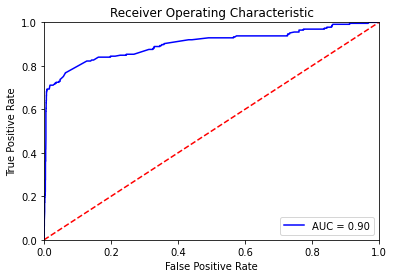

In [133]:
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Our model have 90% roc_auc score for predicting the likelihood

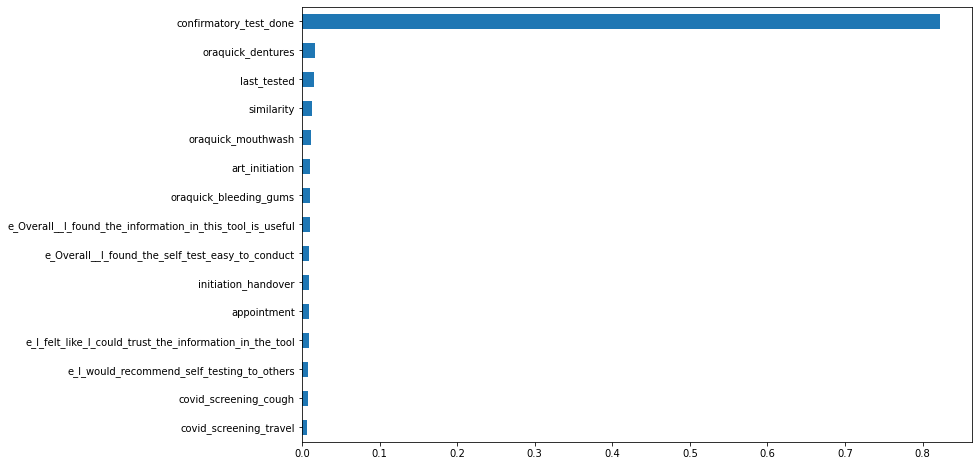

In [134]:
plt.figure(figsize=(12,8))
fi = pd.Series(index = X_train.columns, data = xgc.feature_importances_)
fi.sort_values(ascending=False)[0:15][::-1].plot(kind = 'barh')
plt.show()

### Using explaianble to make decision

In [135]:
# creating an explainer for our model
explainer = shap.TreeExplainer(xgc)

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_test)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

# displaying the first 5 rows of the shap values table
pd.DataFrame(shap_values).head()

Expected Value: -3.2963135


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.00000,-0.43984,0.02908,0.00260,-0.00111,0.00000,0.00000,-0.00970,0.01044,-0.00109,...,-0.00336,-0.03658,0.01686,-0.05634,-0.02836,0.05906,0.10100,-0.03853,-0.01316,-0.00300
1,0.00000,-0.87686,0.07475,-0.00185,-0.00006,0.00000,0.00000,-0.00861,0.01029,-0.00072,...,-0.00297,-0.03614,0.02110,0.01919,-0.00841,0.04555,0.05488,-0.04872,-0.01957,0.00450
2,0.00000,-0.54377,0.07700,0.00260,-0.00108,0.00000,0.00000,-0.02126,0.01010,-0.00070,...,-0.00280,-0.02557,0.02124,0.04939,-0.14609,-1.02408,0.06445,-0.06537,-0.06701,0.29550
3,0.00000,0.01011,0.04727,0.00265,-0.00093,0.00000,0.00000,-0.01725,0.00990,0.00002,...,-0.00673,-0.03071,0.01940,0.12165,-0.02207,0.04590,-0.36755,-0.00604,0.11736,-0.37320
4,0.00000,-0.77056,-0.53187,0.00487,-0.00050,0.00000,0.00000,-0.02007,0.00919,0.20456,...,-0.00271,-0.05593,0.01700,-0.55330,-0.02284,-0.04990,-0.03120,-0.02424,-0.02482,0.00842


Also, the **Expected Value: -3.2963135** being displayed above will be used as the **base value** throughout all the visualizations below. The values above this base value will be put into class 1 (result is positive) wheras the values below it will be put into class 0 (result is negative).

In [136]:
y_test.iloc[0]

0

In [137]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
                shap_values[0,:], X_test.iloc[0,:])

The first patient in the test data result is negative.

Most features likes **confirmatory_test_done** = unknown
**Last_tested** = 3_to_6_months
In blues colour pushes the patient result to be negative.

### Feature importance with shap

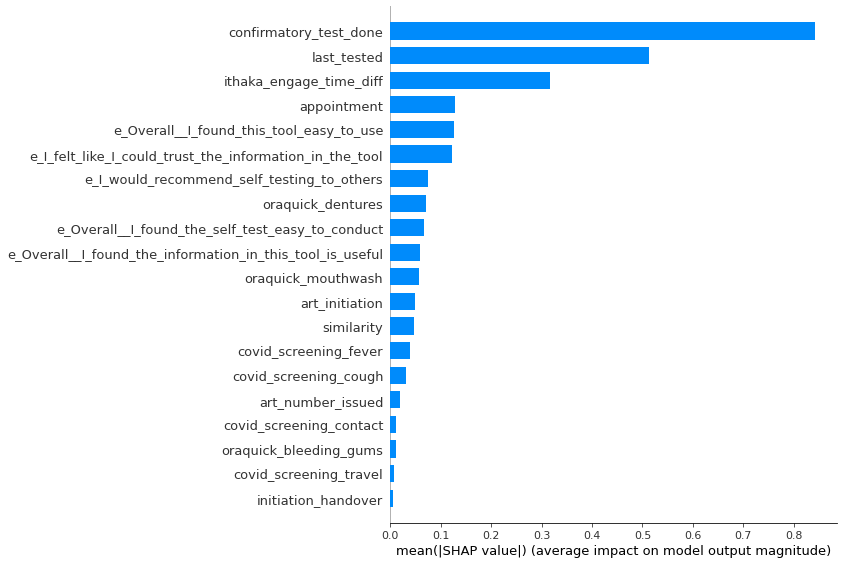

In [138]:
shap.initjs()
shap.summary_plot(shap_values, 
                  X_test, plot_type="bar")

The top 5 features for determining whether a test response will be positive or negative are:

1. Confirmatory test

2. last_tested

3. engage time difference

4. appointment

5. how ease to use a tool

Shap plot to know how each features are important to predict a test negative or positive

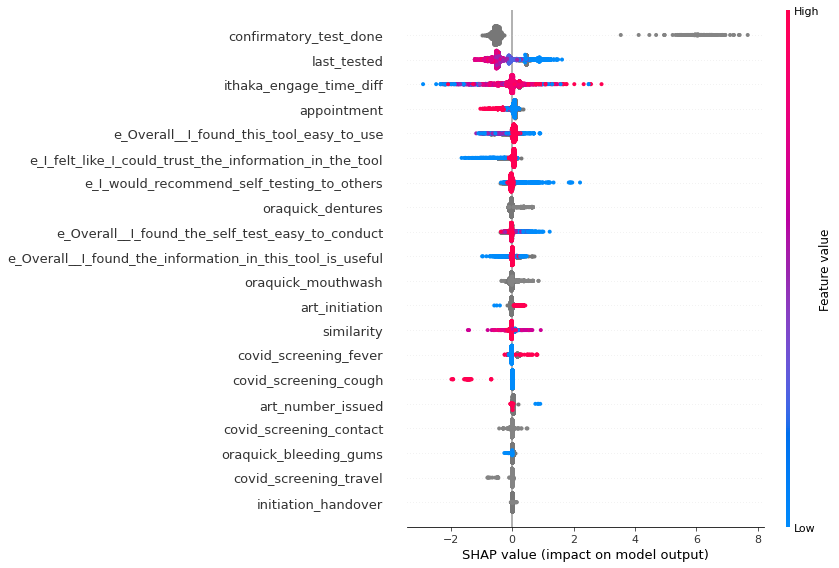

In [139]:
shap.initjs()
shap.summary_plot(shap_values, X_test)

### conclusion

The lower the last day checked the higher that the results are positive.

Appointment is s